# Audio Resampling

The main idea of this notebook is to reduce the sampling rate. As a result, there will be a reduction in the size of the manipulated data. Besides that the quality of the resampled audio will approach the usual quality of a telephone call speech.

In [1]:
import os
from sys import getsizeof
import scipy
import numpy as np
from tqdm import tqdm
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)
sigma = 0.05
filename = '../datasets/constituicaoBR/wav/art001a.wav'

## Audio with Sample Rate equals to 22050 Hz

Audio size in memory for 22050 Hz: 2375.1 kb


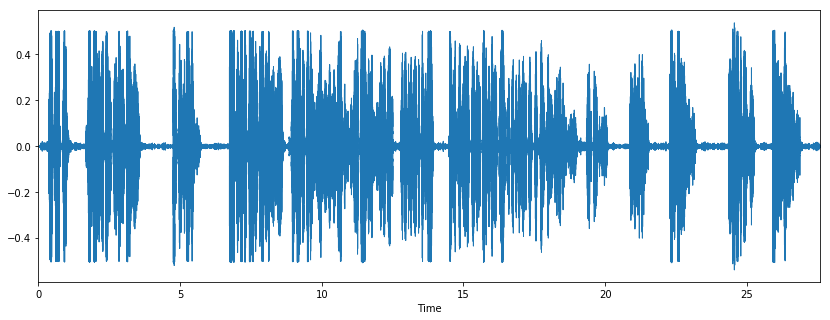

In [2]:
x_22k, sr_22k = librosa.load(filename)
print('Audio size in memory for {:d} Hz: {:.01f} kb'.format(sr_22k, getsizeof(x_22k) / 1024))
plt.figure(figsize = (14, 5))
librosa.display.waveplot(x_22k, sr_22k)
plt.show()
ipd.Audio(x_22k, rate = sr_22k)

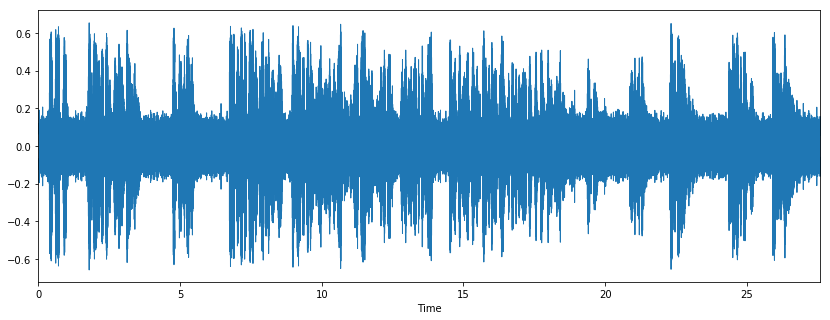

In [3]:
noise_22k = np.random.normal(scale = sigma, size = x_22k.shape)
noisy_x_22k = x_22k + noise_22k
plt.figure(figsize = (14, 5))
librosa.display.waveplot(noisy_x_22k, sr_22k)
plt.show()
ipd.Audio(noisy_x_22k, rate = sr_22k)

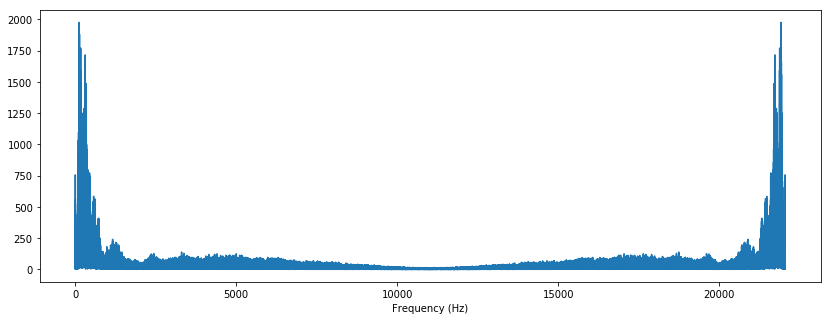

In [4]:
X_22k = scipy.fft(x_22k)
X_22k_mag = np.absolute(X_22k)
f_22k = np.linspace(0, sr_22k, len(X_22k_mag))
plt.figure(figsize = (14, 5))
plt.plot(f_22k, X_22k_mag)
plt.xlabel('Frequency (Hz)')
plt.show()

The quality of the original audio is exceptional. However, it demands lot of space in memory

## Audio with Sample Rate equals to 11025 Hz

Audio size in memory for 11025 Hz: 1187.6 kb


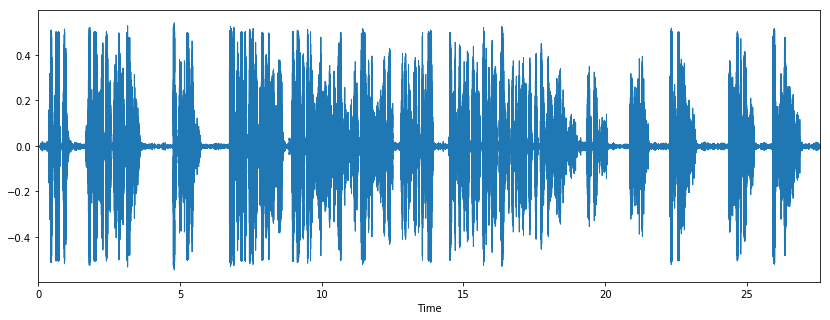

Resampling compression: 50.0%
Resulting reduction: 50.0%


In [5]:
sr_11k = 11025
x_11k = librosa.resample(x_22k, sr_22k, sr_11k)
librosa.output.write_wav('../datasets/sr{:d}kHz-art001.wav'.format(sr_11k // 1000), x_11k, sr_11k)
print('Audio size in memory for {:d} Hz: {:.01f} kb'.format(sr_11k, getsizeof(x_11k) / 1024))
plt.figure(figsize = (14, 5))
librosa.display.waveplot(x_11k, sr_11k)
plt.show()
print('Resampling compression: {:.01f}%\nResulting reduction: {:.01f}%'.format(100 * sr_11k / sr_22k, 100 * x_11k.shape[0] / x_22k.shape[0]))
ipd.Audio(x_11k, rate = sr_11k)

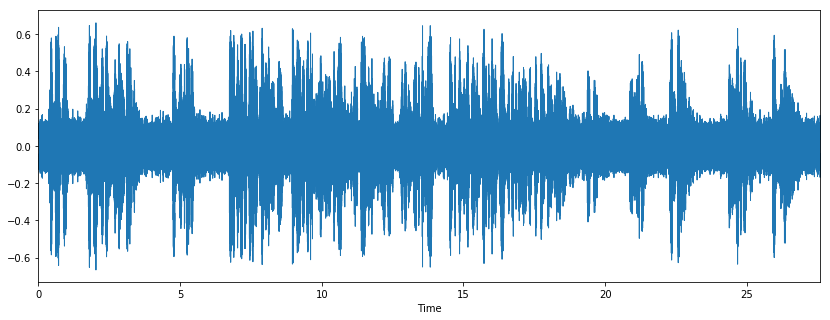

In [6]:
noise_11k = np.random.normal(scale = sigma, size = x_11k.shape)
noisy_x_11k = x_11k + noise_11k
plt.figure(figsize = (14, 5))
librosa.display.waveplot(noisy_x_11k, sr_11k)
plt.show()
ipd.Audio(noisy_x_11k, rate = sr_11k)

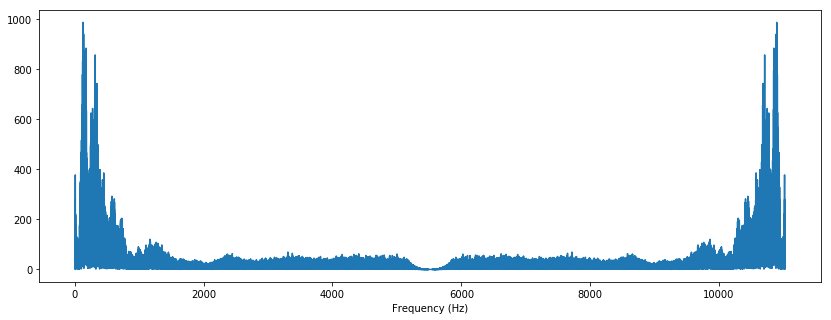

In [7]:
X_11k = scipy.fft(x_11k)
X_11k_mag = np.absolute(X_11k)
f_11k = np.linspace(0, sr_11k, len(X_11k_mag))
plt.figure(figsize = (14, 5))
plt.plot(f_11k, X_11k_mag)
plt.xlabel('Frequency (Hz)')
plt.show()

## Audio with Sample Rate equals to 8 kHz (enables sampling the voice frequency range)

In telephony, the usable voice frequency band ranges from approximately 300 Hz to 3400 Hz. It is for this reason that the ultra low frequency band of the electromagnetic spectrum between 300 and 3000 Hz is also referred to as voice frequency.

Per the Nyquist–Shannon sampling theorem, the sampling frequency (8 kHz) must be at least twice the highest component of the voice frequency via appropriate filtering prior to sampling at discrete times (4 kHz) for effective reconstruction of the voice signal.

@misc{titze1998principles,
  title={Principles of voice production},
  author={Titze, Ingo R and Martin, Daniel W},
  year={1998},
  publisher={ASA}
}

Audio size in memory for 8000 Hz: 861.8 kb


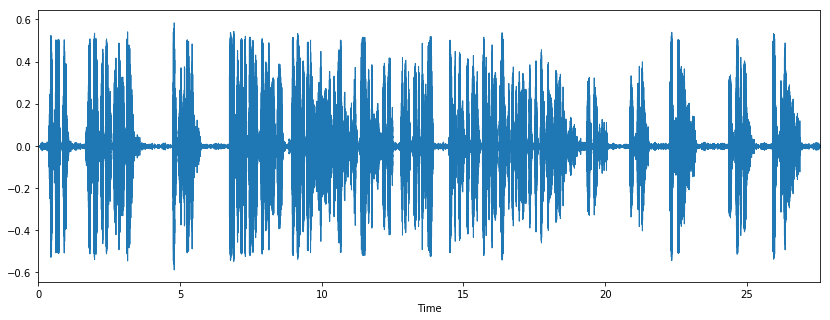

Resampling compression: 36.3%
Resulting reduction: 36.3%


In [8]:
sr_8k = 8000
x_8k = librosa.resample(x_22k, sr_22k, sr_8k)
librosa.output.write_wav('../datasets/sr{:d}kHz-art001.wav'.format(sr_8k // 1000), x_8k, sr_8k)
print('Audio size in memory for {:d} Hz: {:.01f} kb'.format(sr_8k, getsizeof(x_8k) / 1024))
plt.figure(figsize = (14, 5))
librosa.display.waveplot(x_8k, sr_8k)
plt.show()
print('Resampling compression: {:.01f}%\nResulting reduction: {:.01f}%'.format(100 * sr_8k / sr_22k, 100 * x_8k.shape[0] / x_22k.shape[0]))
ipd.Audio(x_8k, rate = sr_8k)

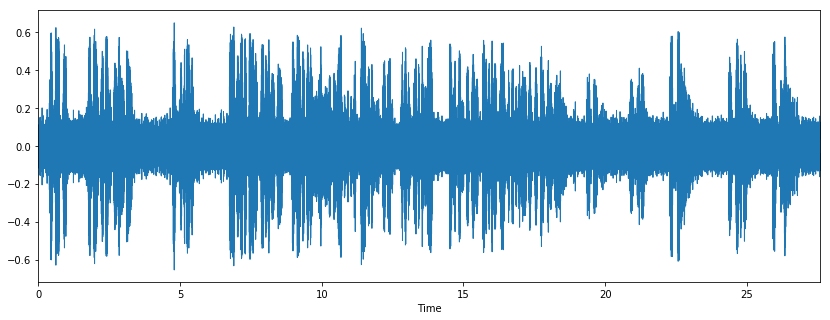

In [9]:
noise_8k = np.random.normal(scale = sigma, size = x_8k.shape)
noisy_x_8k = x_8k + noise_8k
plt.figure(figsize = (14, 5))
librosa.display.waveplot(noisy_x_8k, sr_8k)
plt.show()
ipd.Audio(noisy_x_8k, rate = sr_8k)

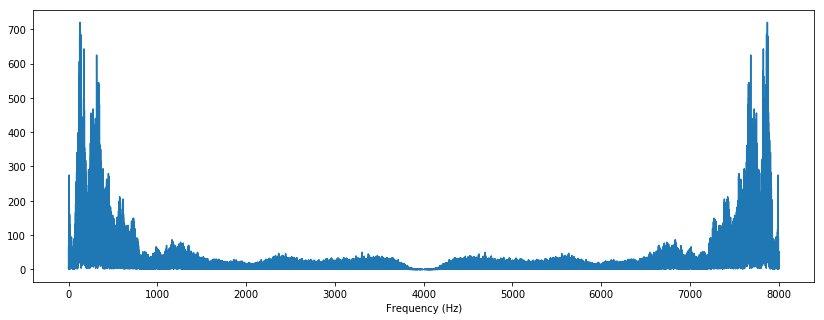

In [10]:
X_8k = scipy.fft(x_8k)
X_8k_mag = np.absolute(X_8k)
f_8k = np.linspace(0, sr_8k, len(X_8k_mag))
plt.figure(figsize = (14, 5))
plt.plot(f_8k, X_8k_mag)
plt.xlabel('Frequency (Hz)')
plt.show()



## Audio with Sample Rate equals to 5512 Hz

Audio size in memory for 5512 Hz: 593.8 kb


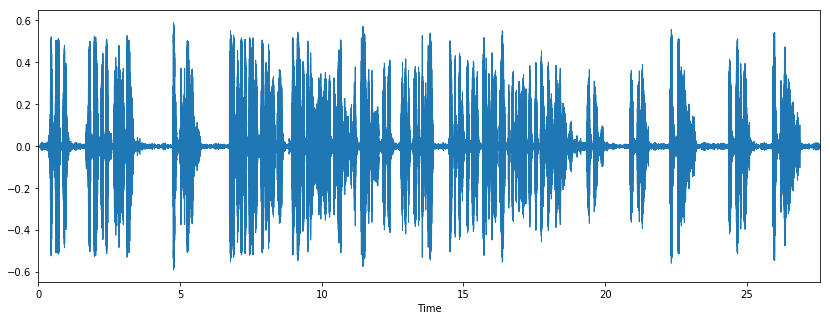

Resampling compression: 25.0%
Resulting reduction: 25.0%


In [11]:
sr_5k = 5512
x_5k = librosa.resample(x_22k, sr_22k, sr_5k)
librosa.output.write_wav('../datasets/sr{:d}kHz-art001.wav'.format(sr_5k // 1000), x_5k, sr_5k)
print('Audio size in memory for {:d} Hz: {:.01f} kb'.format(sr_5k, getsizeof(x_5k) / 1024))
plt.figure(figsize = (14, 5))
librosa.display.waveplot(x_5k, sr_5k)
plt.show()
print('Resampling compression: {:.01f}%\nResulting reduction: {:.01f}%'.format(100 * sr_5k / sr_22k, 100 * x_5k.shape[0] / x_22k.shape[0]))
ipd.Audio(x_5k, rate = sr_5k)

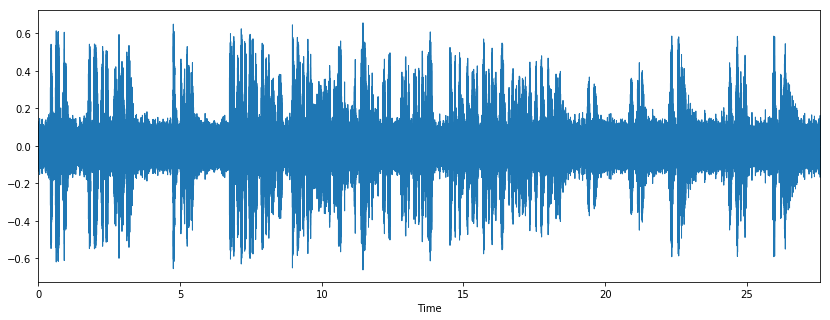

In [12]:
noise_5k = np.random.normal(scale = sigma, size = x_5k.shape)
noisy_x_5k = x_5k + noise_5k
plt.figure(figsize = (14, 5))
librosa.display.waveplot(noisy_x_5k, sr_5k)
plt.show()
ipd.Audio(noisy_x_5k, rate = sr_5k)

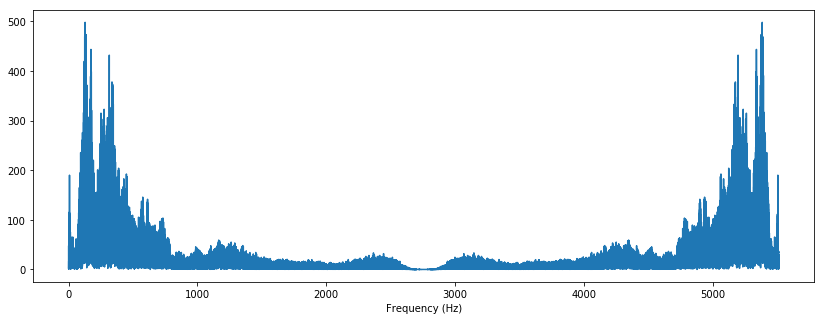

In [13]:
X_5k = scipy.fft(x_5k)
X_5k_mag = np.absolute(X_5k)
f_5k = np.linspace(0, sr_5k, len(X_5k_mag))
plt.figure(figsize = (14, 5))
plt.plot(f_5k, X_5k_mag)
plt.xlabel('Frequency (Hz)')
plt.show()

## Audio with Sample Rate equals to 2205 Hz

Audio size in memory for 2205 Hz: 237.6 kb


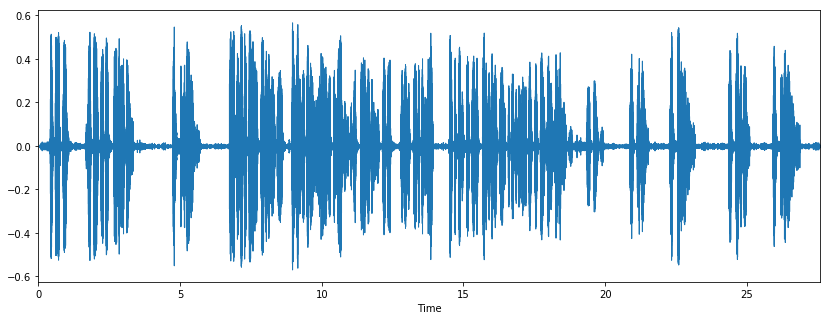

Resampling compression: 10.0%
Resulting reduction: 10.0%


In [14]:
sr_2k = 2205
x_2k = librosa.resample(x_22k, sr_22k, sr_2k)
librosa.output.write_wav('../datasets/sr{:d}kHz-art001.wav'.format(sr_2k // 1000), x_2k, sr_2k)
print('Audio size in memory for {:d} Hz: {:.01f} kb'.format(sr_2k, getsizeof(x_2k) / 1024))
plt.figure(figsize = (14, 5))
librosa.display.waveplot(x_2k, sr_2k)
plt.show()
print('Resampling compression: {:.01f}%\nResulting reduction: {:.01f}%'.format(100 * sr_2k / sr_22k, 100 * x_2k.shape[0] / x_22k.shape[0]))
ipd.Audio(x_2k, rate = sr_2k)

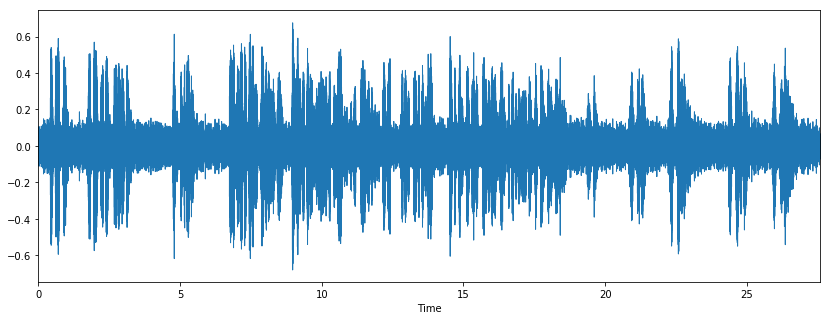

In [15]:
noise_2k = np.random.normal(scale = sigma, size = x_2k.shape)
noisy_x_2k = x_2k + noise_2k
plt.figure(figsize = (14, 5))
librosa.display.waveplot(noisy_x_2k, sr_2k)
plt.show()
ipd.Audio(noisy_x_2k, rate = sr_2k)

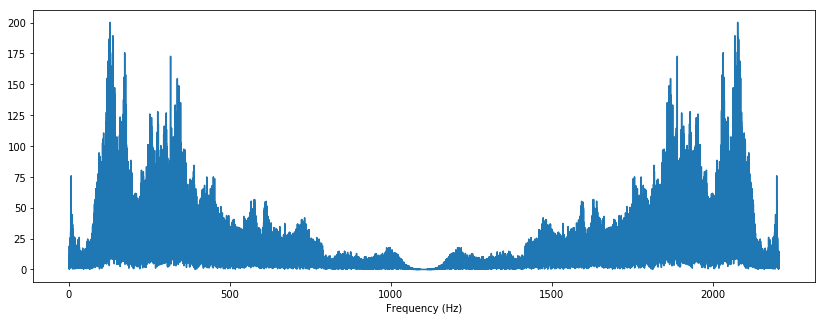

In [16]:
X_2k = scipy.fft(x_2k)
X_2k_mag = np.absolute(X_2k)
f_2k = np.linspace(0, sr_2k, len(X_2k_mag))
plt.figure(figsize = (14, 5))
plt.plot(f_2k, X_2k_mag)
plt.xlabel('Frequency (Hz)')
plt.show()

## Resampling the original audio files to 8 kHz

In [18]:
!rm -rf ../datasets/constituicaoBR/resampled_wav
SAMPLE_RATE = 8000
np.random.seed(42)
path = '../datasets/constituicaoBR/wav'
resampling_path = '/resampled_wav'
counter = 0
for parent, dirs, files in tqdm(os.walk(path)):
    if not parent.endswith('/wav'):
        print('SKIPPING: {}'.format(parent))
        continue
    dest_parent = parent.replace('/wav', resampling_path)
    if len(files) > 0 and not os.path.exists(dest_parent):
        os.mkdir(dest_parent)
    for file in files:
        x, sr = librosa.load(os.path.join(parent, file))
        x = librosa.resample(x, sr, SAMPLE_RATE)
        dest = os.path.join(dest_parent, 'sr{:d}kHz-{:s}'.format(SAMPLE_RATE // 1000, file))
        librosa.output.write_wav(dest, x, SAMPLE_RATE)
        counter += 1
        print('Resampled new audio file and saved in {}!'.format(dest))
print('Resampled {} audio files.'.format(counter))


0it [00:00, ?it/s]

Resampled new audio file and saved in ../datasets/constituicaoBR/resampled_wav/sr8kHz-art049f.wav!
Resampled new audio file and saved in ../datasets/constituicaoBR/resampled_wav/sr8kHz-dt046b.wav!
Resampled new audio file and saved in ../datasets/constituicaoBR/resampled_wav/sr8kHz-art239b.wav!
Resampled new audio file and saved in ../datasets/constituicaoBR/resampled_wav/sr8kHz-dt081d.wav!
Resampled new audio file and saved in ../datasets/constituicaoBR/resampled_wav/sr8kHz-art100b.wav!
Resampled new audio file and saved in ../datasets/constituicaoBR/resampled_wav/sr8kHz-art057a.wav!
Resampled new audio file and saved in ../datasets/constituicaoBR/resampled_wav/sr8kHz-dt034l.wav!
Resampled new audio file and saved in ../datasets/constituicaoBR/resampled_wav/sr8kHz-art026b.wav!
Resampled new audio file and saved in ../datasets/constituicaoBR/resampled_wav/sr8kHz-art247b.wav!
Resampled new audio file and saved in ../datasets/constituicaoBR/resampled_wav/sr8kHz-art201e.wav!
Resampled new


1it [11:35, 695.88s/it]


Resampled new audio file and saved in ../datasets/constituicaoBR/resampled_wav/sr8kHz-art029j.wav!
Resampled 1255 audio files.
